# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setting units for temperature
temp_units = 'imperial'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifying the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm sufficient count
len(cities)

637

In [3]:
# Base URL to requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={temp_units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Creating lists to add the data from API queries
City_list = []
Latitudes = []
Longitudes = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed	= []
Country = []
Date = []

#Loop which will query openweathermap API for data per city and adds the data to the lists made above
record = 0
for cityname in cities:
    try:
        response = requests.get(query_url+cityname).json()
        Latitudes.append(response['coord']['lat'])
        Longitudes.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        City_list.append(cityname)
        record+=1
        print(f'Processing Record {record} | {cityname}')
    except:
        record+=1
        print('City not found. Skipping....')
    continue

Processing Record 1 | nikolskoye
Processing Record 2 | dikson
Processing Record 3 | pekan
Processing Record 4 | brenes
Processing Record 5 | polson
Processing Record 6 | amurzet
Processing Record 7 | singaraja
Processing Record 8 | tuatapere
City not found. Skipping....
Processing Record 10 | yumen
Processing Record 11 | kapaa
Processing Record 12 | makubetsu
Processing Record 13 | boyolangu
Processing Record 14 | sistranda
Processing Record 15 | san quintin
Processing Record 16 | kahului
Processing Record 17 | ixtapa
Processing Record 18 | chon daen
Processing Record 19 | cape town
Processing Record 20 | hobart
Processing Record 21 | jumla
Processing Record 22 | jamestown
Processing Record 23 | sinjar
Processing Record 24 | carnarvon
Processing Record 25 | putina
Processing Record 26 | aksarka
Processing Record 27 | axim
Processing Record 28 | rikitea
Processing Record 29 | bluff
City not found. Skipping....
Processing Record 31 | chuy
Processing Record 32 | lebu
Processing Record 33 

In [10]:
#Testing newly created lists to ensure the length of each list is equal to make a dataframe of the data collected from the API
print(len(City_list))
print(len(Cloudiness))
print(len(Country))
print(len(Date))
print(len(Humidity))
print(len(Latitudes))
print(len(Longitudes))
print(len(Max_Temp))
print(len(Wind_Speed))

587
587
587
587
587
587
587
587
587


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {"City": City_list,
                "Cloudiness": Cloudiness,
                "Country":Country,
                "Date" : Date,
                "Humidity" : Humidity,
                "Lat" : Latitudes,
                "Lng" : Longitudes,
                "Max Temp" : Max_Temp,
                "Wind Speed": Wind_Speed
                }
weather_df = pd.DataFrame(weather_dict)
# Outputting data to csv
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,10,RU,1669019385,84,59.7035,30.7861,21.09,4.70
1,dikson,31,RU,1669019334,96,73.5069,80.5464,-22.18,4.97
2,pekan,100,MY,1669019417,66,3.4836,103.3996,89.71,3.76
3,brenes,75,ES,1669019418,97,37.5494,-5.8714,55.85,3.44
4,polson,57,US,1669019418,65,47.6936,-114.1632,15.73,1.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

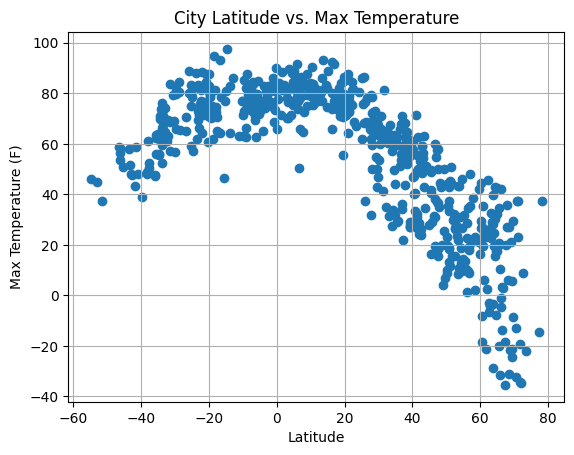

In [22]:
# Building a scatter plot for latitude vs temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Adding the plot's characteristics
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the plot as a png file
plt.savefig("LatvsTempScatter.png")

# Show plot
plt.show()

The scatter plot shows that the closer the city is located to 0 (the Equator), the higher the temperature tends to be. The higher the latitude of a city is, the lower higher the temperature decrease is, with temperatures hitting negative values. The temperature also seems to decrease then the latitude a city is located in is lower, but the temperature change is not as pronounced, as the lowest temperatures do not go below 30 degrees.

## Latitude vs. Humidity Plot

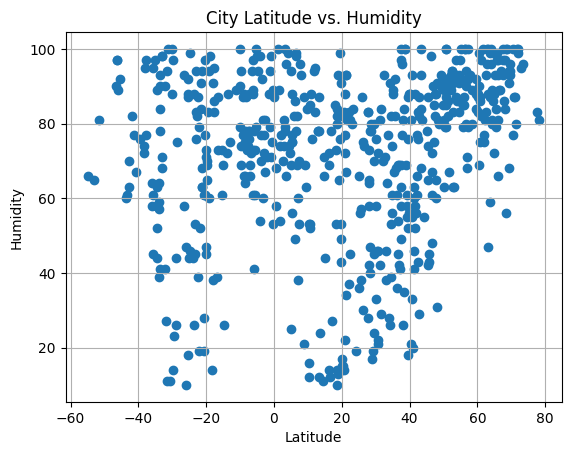

In [23]:
# Building a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Adding the graph's properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure as a png file
plt.savefig("LatvsHumidityScatter.png")

# Show plot
plt.show()

The plot above shows that latitude has no correlation with a city's humidity level.

## Latitude vs. Cloudiness Plot

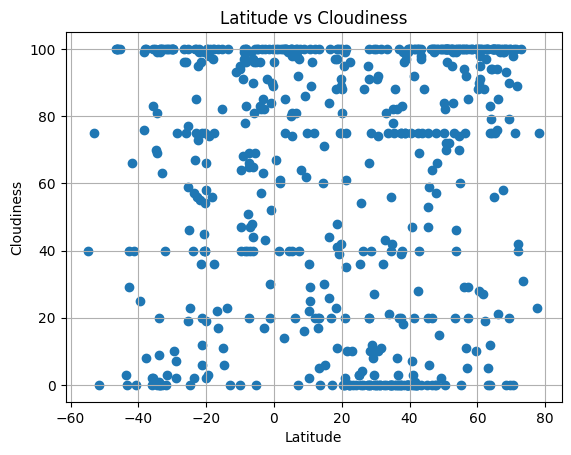

In [24]:
#Building a scatter plot that shows Latitude vs Cloudiness
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o')

#Adding the graph's properties
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the plot as a png file
plt.savefig('LatvsCloudiness.png')
#Displaying the plot
plt.show()

Based on the scatter plot above, we can see that latitude does not determine how cloudy a city tends to be.

## Latitude vs. Wind Speed Plot

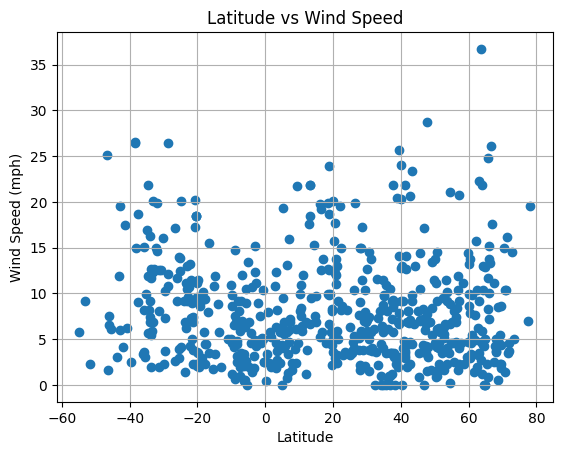

In [27]:
#Building a scatter plot that shows Latitude vs Wind Speed
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o')

#Adding the graph's properties
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the plot as a png file
plt.savefig('LatvsWindSpeedScatter.png')
#Displaying the plot
plt.show()

Wind speed appears to have relatively the same distribution of values regardless of the latitude the city is located in. There are very few outliers that go above 20 miles per hour, but even those outliers are not concentrated to any one side of the scatter plot.

## Linear Regression

In [29]:
# Creating Dataframes for Northern and Southern Hemispheres
northern_hem_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_hem_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

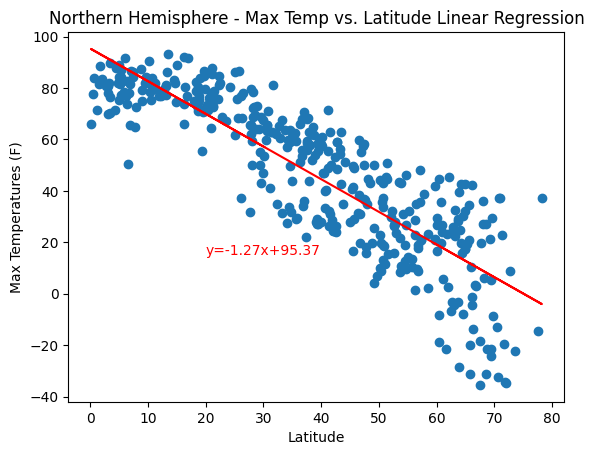

In [69]:
#Creating a scatter plot of Northern Hemisphere temperature vs latitude
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Max Temp'],marker='o')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')

#Performing Linear Regression on temp vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df['Lat'],northern_hem_df['Max Temp'])

# Getting regression values
regress_values = northern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(northern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line,(20,15),fontsize=10,color='red')
plt.show()

In [48]:
# Printing the r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.7399172725483398


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

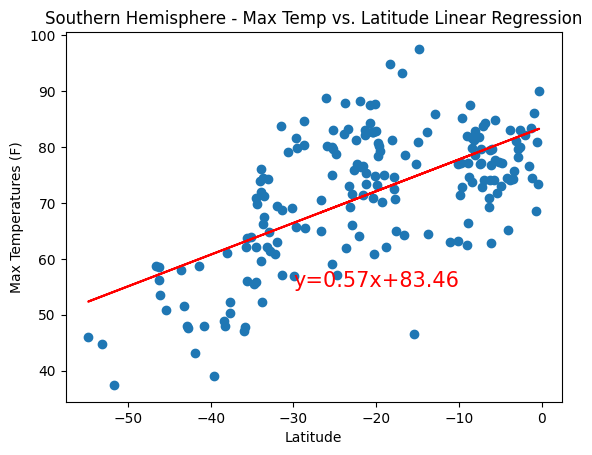

In [60]:
#Creating a scatter plot of Southern Hemisphere temperature vs latitude
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Max Temp'],marker='o')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')

#Performing Linear Regression on temp vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df['Lat'],southern_hem_df['Max Temp'])

# Getting regression values
regress_values = southern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line_2 = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

#Plotting the linear regression line and the scatter plot
plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line_2,(-30,55),fontsize=15,color='red')
plt.show()

In [50]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.4015044803962236


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

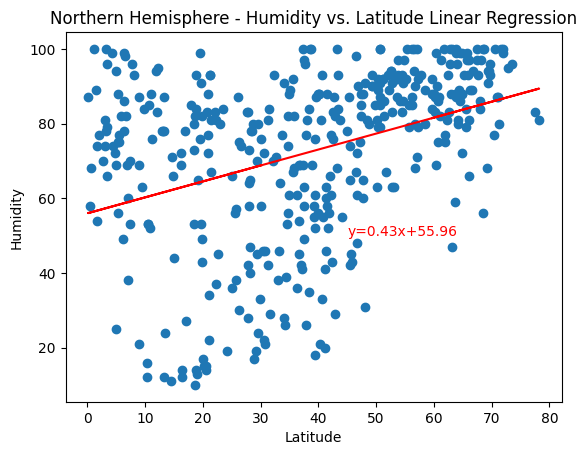

In [70]:
#Creating a scatter plot of Northern Hemisphere Humidity vs latitude
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Humidity'],marker='o')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Performing Linear Regression on Humidity vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df['Lat'],northern_hem_df['Humidity'])

# Getting regression values
regress_values = northern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(northern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line,(45,50),fontsize=10,color='red')
plt.show()

In [66]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.139246908376213


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

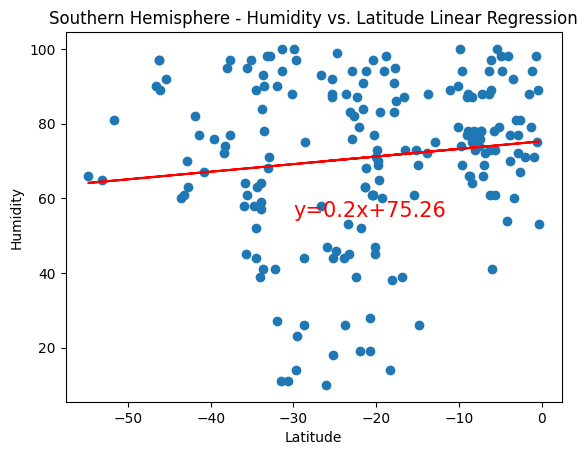

In [67]:
#Creating a scatter plot of Southern Hemisphere humidity vs latitude
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Humidity'],marker='o')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Performing Linear Regression on Humidity vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df['Lat'],southern_hem_df['Humidity'])

# Getting regression values
regress_values = southern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line_2 = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

#Plotting the linear regression line and the scatter plot
plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line_2,(-30,55),fontsize=15,color='red')
plt.show()

In [68]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.015430626677929132


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

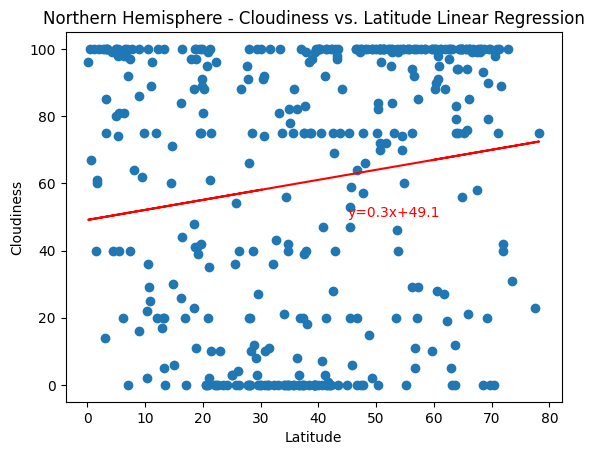

In [72]:
#Creating a scatter plot of Northern Hemisphere Humidity vs latitude
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Cloudiness'],marker='o')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Performing Linear Regression on Cloudiness vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df['Lat'],northern_hem_df['Cloudiness'])

# Getting regression values
regress_values = northern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(northern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line,(45,50),fontsize=10,color='red')
plt.show()

In [73]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.022715499808899628


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

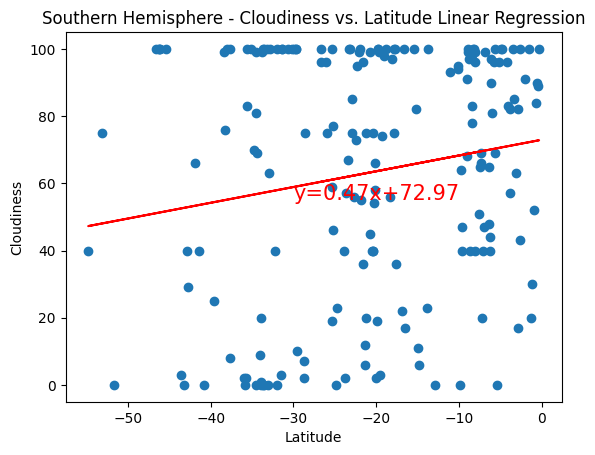

In [74]:
#Creating a scatter plot of Southern Hemisphere Cloudiness vs latitude
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Cloudiness'],marker='o')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Performing Linear Regression on Cloudiness vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df['Lat'],southern_hem_df['Cloudiness'])

# Getting regression values
regress_values = southern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line_2 = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

#Plotting the linear regression line and the scatter plot
plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line_2,(-30,55),fontsize=15,color='red')
plt.show()

In [75]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.02888047249630493


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

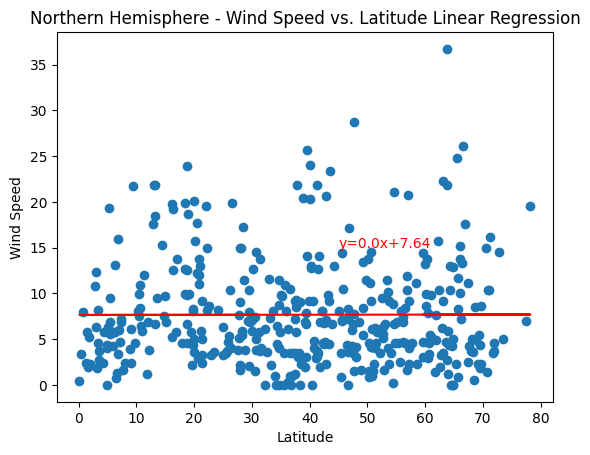

In [77]:
#Creating a scatter plot of Northern Hemisphere Wind Speed vs latitude
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Wind Speed'],marker='o')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Performing Linear Regression on Wind Speed vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df['Lat'],northern_hem_df['Wind Speed'])

# Getting regression values
regress_values = northern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(northern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line,(45,15),fontsize=10,color='red')
plt.show()

In [78]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 4.873871627945277e-06


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

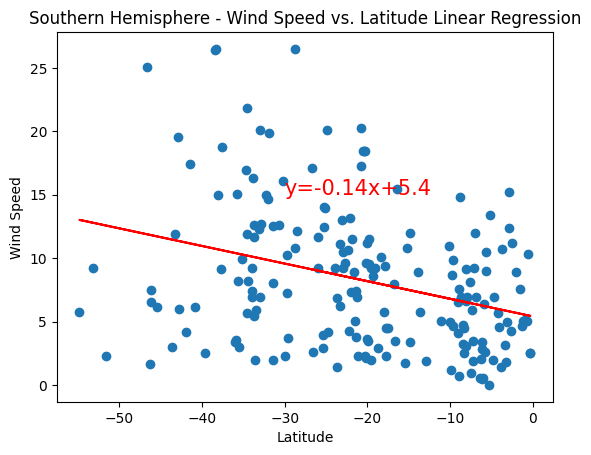

In [80]:
#Creating a scatter plot of Southern Hemisphere Wind Speed vs latitude
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Wind Speed'],marker='o')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Performing Linear Regression on Wind Speed vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df['Lat'],southern_hem_df['Wind Speed'])

# Getting regression values
regress_values = southern_hem_df['Lat'] * slope + intercept

#Making equation for linear regression line
regress_line_2 = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))

#Plotting the linear regression line and the scatter plot
plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(regress_line_2,(-30,15),fontsize=15,color='red')
plt.show()

In [81]:
# Printing r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.10528595553618818


Based on the linear regression plots for wind speed, humidity, temperature and cloudiness vs latitude for both the southern and northern hemispheres, it can observed that the effects of latitude on the wind speed, humidity and cloudiness of a city are very weak. For the northern hemisphere, there is a high correlation between the effect of latitude ona city's temperature. For the southern hemisphere there is a moderate correlation between the effect of latitude on a city's temperature.